In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Read Dataset

In [2]:
import pandas as pd
train = pd.read_csv("training_set.csv")
test = pd.read_csv("testing_set.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Missing data

In [4]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
for i in train.columns:
    if train[i].dtype!='object':
        x = train[i].mean()
        train[i] = train[i].fillna(x)
    else:
        x = train[i].mode()[0]
        train[i] = train[i].fillna(x)

In [6]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [10]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [11]:
for i in test.columns:
    if test[i].dtype!='object':
        x = test[i].mean()
        test[i] = test[i].fillna(x)
    else:
        x = test[i].mode()[0]
        test[i] = test[i].fillna(x)

In [12]:
test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

EDA

In [8]:
cat = []
con = []
for i in train.columns:
    if(train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)


Define X and Y

In [19]:
X = train.drop(labels=["Id","SalePrice"],axis=1)
Y = train[["SalePrice"]]

In [20]:
X.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

Remove Outliers

In [21]:
X1 = X.select_dtypes(include='object')
X2 = X.select_dtypes(exclude='object')

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2 = pd.DataFrame(scaler.fit_transform(X2),columns=X2.columns)

In [23]:
outliers = []
for i in X2.columns:
    ol = X2[(X2[i]<-3)|(X2[i]>3)].index
    outliers.extend(ol)

In [24]:
outliers

[9,
 48,
 93,
 125,
 165,
 246,
 291,
 300,
 312,
 335,
 411,
 488,
 520,
 535,
 635,
 637,
 703,
 705,
 713,
 861,
 969,
 985,
 1030,
 1062,
 1144,
 1186,
 1190,
 1266,
 1393,
 1416,
 171,
 197,
 231,
 277,
 313,
 446,
 807,
 909,
 934,
 1107,
 1127,
 1173,
 1182,
 1211,
 1298,
 1337,
 53,
 249,
 313,
 335,
 384,
 451,
 457,
 661,
 706,
 769,
 848,
 1298,
 1396,
 375,
 533,
 88,
 185,
 191,
 218,
 241,
 250,
 304,
 375,
 378,
 398,
 461,
 508,
 519,
 583,
 676,
 703,
 726,
 745,
 980,
 991,
 1123,
 1149,
 1213,
 1268,
 1327,
 1352,
 1435,
 1457,
 304,
 630,
 747,
 1132,
 1137,
 1349,
 37,
 58,
 70,
 105,
 115,
 161,
 169,
 178,
 224,
 297,
 349,
 403,
 477,
 517,
 523,
 654,
 691,
 718,
 755,
 763,
 798,
 808,
 825,
 898,
 981,
 1111,
 1169,
 1228,
 1289,
 1298,
 1373,
 1417,
 70,
 178,
 523,
 898,
 1182,
 1298,
 24,
 52,
 113,
 116,
 153,
 166,
 233,
 253,
 260,
 263,
 271,
 273,
 313,
 322,
 355,
 414,
 440,
 446,
 470,
 493,
 542,
 548,
 577,
 586,
 599,
 666,
 697,
 764,
 785,
 82

In [26]:
X1.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [28]:
X = X.drop(index=outliers,axis=0)
Y = Y.drop(index=outliers,axis=0)

In [29]:
X.shape

(1021, 79)

In [30]:
X.index = range(0,1021,1)
Y.index = range(0,1021,1)

Preprocessing

In [32]:
cat=X1.columns
con=X2.columns

In [33]:
cat

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
con

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [35]:
X_cat = pd.get_dummies(X[cat])

In [36]:
X_cat

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,True,False,True,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,True,False,True,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,False,False,False,False,True,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1017,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False
1018,False,True,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
1019,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [37]:
X_con = X[con]
X_con = pd.DataFrame(scaler.fit_transform(X[con]),columns=con)
X_con.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.151802,-0.142725,-0.196750,0.683815,-0.527526,0.953684,0.812282,0.861524,0.708378,-0.246206,...,0.407109,-0.824474,0.343944,-0.344188,-0.031311,-0.207246,0.0,-0.145363,-1.590024,0.142357
1,0.151802,0.020779,0.572050,0.683815,-0.527526,0.884839,0.764039,0.600445,0.168088,-0.246206,...,0.708398,-0.824474,-0.009792,-0.344188,-0.031311,-0.207246,0.0,-0.145363,1.022367,0.142357
2,0.151802,0.892795,1.398510,1.435348,-0.527526,0.850416,0.667554,2.044059,0.583129,-0.246206,...,1.853296,0.968551,0.772152,-0.344188,-0.031311,-0.207246,0.0,-0.145363,2.141963,0.142357
3,-0.841723,0.402286,0.251900,1.435348,-0.527526,0.988107,0.908768,0.784736,2.336615,-0.246206,...,0.849000,1.556888,0.269474,-0.344188,-0.031311,-0.207246,0.0,-0.145363,0.649168,-0.603008
4,-0.841723,0.129781,0.558321,-0.819253,-0.527526,-0.354374,-1.020940,-0.643521,1.199551,-0.246206,...,-0.416414,-0.824474,-0.791736,-0.344188,-0.031311,-0.207246,0.0,-0.145363,-1.590024,0.142357


In [38]:
Xnew = X_con.join(X_cat)
Xnew

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.151802,-0.142725,-0.196750,0.683815,-0.527526,0.953684,0.812282,0.861524,0.708378,-0.246206,...,False,False,False,True,False,False,False,False,True,False
1,0.151802,0.020779,0.572050,0.683815,-0.527526,0.884839,0.764039,0.600445,0.168088,-0.246206,...,False,False,False,True,False,False,False,False,True,False
2,0.151802,0.892795,1.398510,1.435348,-0.527526,0.850416,0.667554,2.044059,0.583129,-0.246206,...,False,False,False,True,False,False,False,False,True,False
3,-0.841723,0.402286,0.251900,1.435348,-0.527526,0.988107,0.908768,0.784736,2.336615,-0.246206,...,False,False,False,True,False,False,False,False,True,False
4,-0.841723,0.129781,0.558321,-0.819253,-0.527526,-0.354374,-1.020940,-0.643521,1.199551,-0.246206,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,3.132376,-1.777756,-1.507829,-0.819253,-0.527526,1.022529,0.908768,-0.029217,0.317896,-0.246206,...,False,False,False,True,False,False,False,False,True,False
1017,-0.841723,1.219801,2.210418,-0.819253,-0.527526,1.056952,0.957010,-0.643521,-1.025461,-0.246206,...,False,False,False,True,True,False,False,False,False,False
1018,-0.841723,-0.306228,-0.457593,0.683815,-0.527526,0.988107,0.908768,-0.643521,-0.018557,-0.246206,...,False,False,False,True,False,False,False,False,True,False
1019,0.151802,-0.306228,-0.343097,-0.067719,-0.527526,0.815994,0.667554,-0.643521,-1.025461,-0.246206,...,False,False,False,True,False,False,False,False,True,False


In [39]:
Xnew.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 259, dtype: int64

Training testing split

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

Create a Linear model based on selected features

In [47]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

In [48]:
tr_err

10530.93137254902

In [49]:
ts_err

28941134773347.73

In [50]:
Xnew.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.514555,-0.493796,0.129392,-0.092931,0.180344,0.133691,0.077869,-0.090725,0.002391,...,0.021724,-0.032780,-0.037290,0.032668,0.018636,-0.004279,-0.031788,-0.004188,0.022777,-0.038077
LotFrontage,-0.514555,1.000000,0.587723,0.236785,-0.030323,0.158646,0.098952,0.142012,0.164178,-0.016602,...,-0.073824,0.119365,-0.001494,-0.086234,-0.076715,-0.020810,-0.023225,-0.009672,-0.035215,0.119495
LotArea,-0.493796,0.587723,1.000000,0.165487,-0.050157,0.078966,0.036063,0.094867,0.164704,-0.007972,...,-0.028070,0.063298,0.010533,-0.035695,-0.083506,-0.010724,-0.022480,-0.005990,0.011187,0.062350
OverallQual,0.129392,0.236785,0.165487,1.000000,-0.199101,0.642205,0.579849,0.395691,0.177431,-0.145150,...,-0.030875,0.316130,-0.052942,-0.234646,-0.122574,-0.036295,-0.052942,-0.042717,-0.143001,0.315274
OverallCond,-0.092931,-0.030323,-0.050157,-0.199101,1.000000,-0.428017,-0.036611,-0.141509,-0.007047,0.069280,...,-0.047061,-0.159695,-0.023371,0.178415,-0.012961,-0.045924,0.021736,-0.035734,0.146192,-0.161736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.004279,-0.020810,-0.010724,-0.036295,-0.045924,-0.076700,-0.028132,-0.028510,-0.028458,-0.010908,...,-0.002405,-0.014272,-0.001963,0.017441,-0.011647,1.000000,-0.001963,-0.004623,-0.096085,-0.014436
SaleCondition_Alloca,-0.031788,-0.023225,-0.022480,-0.052942,0.021736,-0.046962,-0.021720,0.045482,-0.036291,-0.010908,...,-0.002405,-0.014272,-0.001963,0.017441,-0.011647,-0.001963,1.000000,-0.004623,-0.096085,-0.014436
SaleCondition_Family,-0.004188,-0.009672,-0.005990,-0.042717,-0.035734,-0.057884,-0.079084,-0.001228,-0.034626,-0.004554,...,-0.005665,-0.033620,-0.004623,0.041084,-0.027435,-0.004623,-0.004623,1.000000,-0.226342,-0.034005
SaleCondition_Normal,0.022777,-0.035215,0.011187,-0.143001,0.146192,-0.159620,-0.122388,-0.079117,0.051914,0.091518,...,0.025030,-0.698706,-0.096085,0.702672,-0.570164,-0.096085,-0.096085,-0.226342,1.000000,-0.706711


Regularize

In [51]:
lambdas = []
q = 8
for i in range(0,4000,1):
    q = q + 0.001
    q = round(q,4)
    lambdas.append(q)

In [52]:
from sklearn.linear_model import Ridge
tr = []
ts = []
for i in lambdas:
    rr = Ridge(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

In [53]:
t = range(0,4000,1)


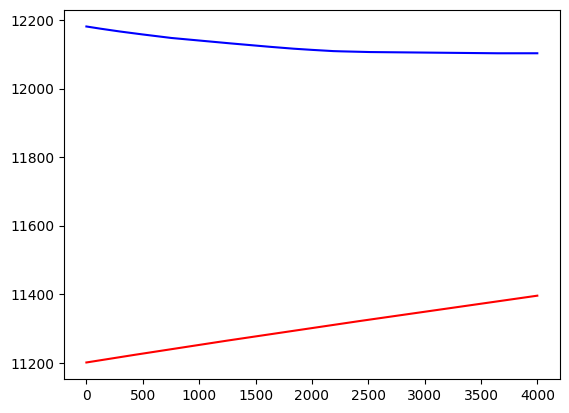

In [54]:

import matplotlib.pyplot as plt
plt.plot(t,tr,c="red")
plt.plot(t,ts,c="blue")

In [56]:
lambdas[-1]

12.0

In [57]:
tr_err

11395.617000973034

In [58]:
ts_err

12103.114615952374

In [59]:
model

Ridge(alpha=12.0)

In [60]:
rr = Ridge(alpha=12.0)
model = rr.fit(xtrain,ytrain)

In [61]:
xtrain.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=259)

Creating test data ready for predictions